### Simple Graph with Nodes & Edges
1. Nodes ==> Nodes are simple python functions to perform some task
2. Edges ==> Connection between nodes (may be conditional edges)
3. State ==> State Schema serves as the input for nodes and edges  (Schema is nothing but some properties, etc., etc.)
4. StateGraph ==> Structure of the entire graph 



### Building Simple Workflow or Graph Using LangGraph
#### State: 
* First, define the State of the Graph 
* The State Schema serves as the input schema for all the Nodes and Edges in the graph
* Use TypedDict class from Python's typing module as our schema, which provides type hints for the keys

### Nodes:
Nodes are just python functions
The first positional argument is the state and defined already.
Because the state is a TypedDict with schema, each node can access the key, graph_state, with state ['graph_state']
Each node returns a new value of the state key "graph_state"
By default, the new value returned by each node will override the prior state value.

In [ ]:
# 1. Define the state
from typing_extensions import TypedDict

class State(TypedDict):
    graph_info: str

In [21]:
### Defining Nodes 

# 2. Define Start_Play node 
def start_play(state:State):  # state of type State (defined in state step previous)
    print("Start_Play node has been called")
    return {"graph_info":state['graph_info']+" I am planning to play"}
    # here graph_info is updating with state of graph_info as "graph_info" defined in previous step

# 3. Define Cricket node 
def cricket(state:State):
    print("My Cricket node has been called")
    return {"graph_info":state['graph_info']+ " Cricket"}  
    # this state['graph_info'] had already state "I am planning to play" and we are adding "Cricket" to it

# 4. Define Badminton node 
def badminton(state:State):
    print("My Badminton node has been called")
    return {"graph_info":state['graph_info']+ " Badminton"}  
    # this state['graph_info'] had already state "I am planning to play" and we are adding "Badminton" to it

In [28]:
### Define the condition for Edges 
import random
from typing import Literal # Literal means constant

def random_play(state:State)->Literal['cricket','badminton']:
    graph_info=state['graph_info']

    if random.random()>0.5:
        return "cricket"
    else:
        return "badminton"

### Graph Construction 
##### Now, we build the graph from our components defined above
* The StateGraph class (this class provided by LangGraph) is the graph class that we can use.
* First, we initialize a StateGraph with the State class we defined above then add our nodes and edges
* We use START Node, a special node that sends user input to the graph, to indicate where to start our graph
* The END Node  is a special node that represents a terminal node 
* Finally, we compile our graph to perform a few basic checks on the graph structure 
* We can visualize the graph as a Mermaid diagram.

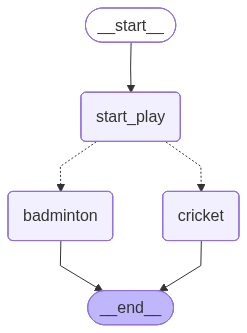

In [26]:
from IPython.display import Image,display
from langgraph.graph import StateGraph,START,END  # This StateGraph is responsible to build the entire workflow

### Building the Graph with input schema 
graph=StateGraph(State)


### Adding the nodes 
graph.add_node("start_play",start_play)  # "node name" and function name 
graph.add_node("cricket",cricket)
graph.add_node("badminton",badminton)

### Schedule the flow of the edge
graph.add_edge(START, "start_play")
graph.add_conditional_edges("start_play",random_play)
graph.add_edge("cricket",END)
graph.add_edge("badminton",END)

# Compile the graph 
graph_builder=graph.compile()

# View the graph 
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [29]:
### Graph Invocation 
graph_builder.invoke({"graph_info":"Hey my name is Venkat"})

Start_Play node has been called
My Cricket node has been called


{'graph_info': 'Hey my name is Venkat I am planning to play Cricket'}